In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading in Data

In [4]:
movies = pd.read_csv("ml-25m/movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings = pd.read_csv("ml-25m/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
tags = pd.read_csv("ml-25m/tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


# Formatting the Data

In [7]:
# Getting all unique genres

all_genres = set()
for row in movies.genres:
    
    if row == "(no genres listed)":
        continue
        
    genre_list = row.split("|")
    
    for genre in genre_list:
        all_genres.add(genre)
        
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [8]:
# Creating new genre columns

for genre in all_genres:
    movies[genre] = 0
    
movies.head()

,movieId,title,genres,Children,Musical,Western,Horror,Comedy,Mystery,IMAX,...,Fantasy,Animation,Sci-Fi,Romance,Documentary,Thriller,War,Drama,Crime,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Assigning values to genre columns (may take some time to run)

for movie_id in movies.movieId:
    genres = movies.loc[movies.movieId == movie_id, "genres"].values[0]
    if genres == "(no genres listed)":
        continue
    genre_list = genres.split("|")
    for genre in genre_list:
        movies.loc[movies.movieId == movie_id, genre] = 1

movies

,movieId,title,genres,Children,Musical,Western,Horror,Comedy,Mystery,IMAX,...,Fantasy,Animation,Sci-Fi,Romance,Documentary,Thriller,War,Drama,Crime,Action
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We (2018),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62419,209159,Window of the Soul (2001),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
62420,209163,Bad Poems (2018),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
62421,209169,A Girl Thing (2001),(no genres listed),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression for a Single User (userId = 1)

In [10]:
# Looking at user id 1

user1 = ratings[ratings.userId == 1]
user1

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
65,1,27193,3.0,1147879774
66,1,27266,4.5,1147879365
67,1,27721,3.0,1147869115
68,1,31956,3.5,1147877610


In [11]:
# Creating feature dataframe

feature_df = pd.DataFrame()
for movie in user1.movieId:
    feature_df = pd.concat([feature_df, 
                            movies.loc[movies.movieId == movie, list(all_genres)]])
    
feature_df["rating"] = list(user1.rating)

feature_df

,Children,Musical,Western,Horror,Comedy,Mystery,IMAX,Film-Noir,Adventure,Fantasy,Animation,Sci-Fi,Romance,Documentary,Thriller,War,Drama,Crime,Action,rating
292,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,5.0
302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.5
303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5.0
654,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,5.0
878,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0
9145,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,4.5
9306,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,3.0
9647,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,3.5


In [12]:
# Train-test split

from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    feature_df.iloc[:, :-1], feature_df.rating, 
    test_size=TEST_SIZE, random_state=42)

print("Training data: " + str(X_train.shape[0]) + " rows")
print("Test data: " + str(X_test.shape[0]) + " rows")

Training data: 56 rows
Test data: 14 rows


In [13]:
# Running linear regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

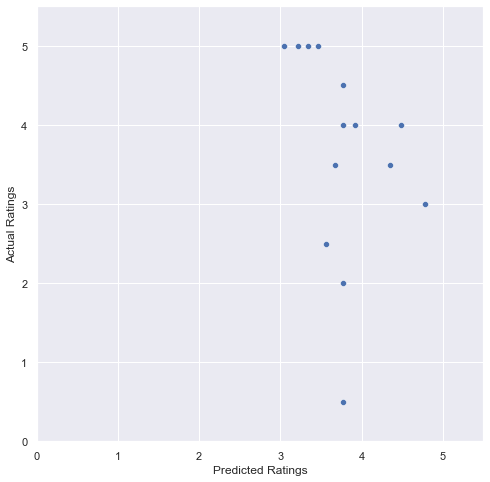

In [14]:
# Predicting on test data

sns.set(rc={'figure.figsize':(8,8)})

y_pred = model.predict(X_test)
y_true = y_test
ax = sns.scatterplot(x=y_pred, y=y_true)
ax.set(xlabel='Predicted Ratings', ylabel='Actual Ratings')

plt.xlim([0, 5.5])
plt.ylim([0, 5.5])
plt.show()

In [15]:
# Getting evaluation metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: " + str(mean_squared_error(y_true, y_pred)))
print("MAE: " + str(mean_absolute_error(y_true, y_pred)))
print("R2: " + str(r2_score(y_true, y_pred)))

MSE: 2.279491206309164
MAE: 1.2420240701790404
R2: -0.3994683678515152


In [16]:
movies.shape

(62423, 22)

In [17]:
# Filtering out 60% of least popular films

PROP_FILTERED = 0.4

sorted_movies = ratings.groupby("movieId").count().sort_values(
    by="userId", ascending=False).index

top_movies = sorted_movies[:int(PROP_FILTERED * len(sorted_movies))]
top_movies

Int64Index([   356,    318,    296,    593,   2571,    260,    480,    527,
               110,   2959,
            ...
             98996,  99028,  99054, 112255, 187325,  99064, 144572, 144608,
             97768, 144602],
           dtype='int64', name='movieId', length=23618)

In [18]:
# Ranking recommended films

unwatched_movies = movies[~movies.movieId.isin(user1.movieId)]
print(unwatched_movies.shape)

top_unwatched = unwatched_movies.loc[unwatched_movies.movieId.isin(top_movies)]

predictions = model.predict(top_unwatched[list(all_genres)])
predictions.sort()
predictions = predictions[::-1]
predictions

(62353, 22)


array([6.39114569, 6.20841346, 6.20841346, ..., 0.67043047, 0.67043047,
       0.67043047])

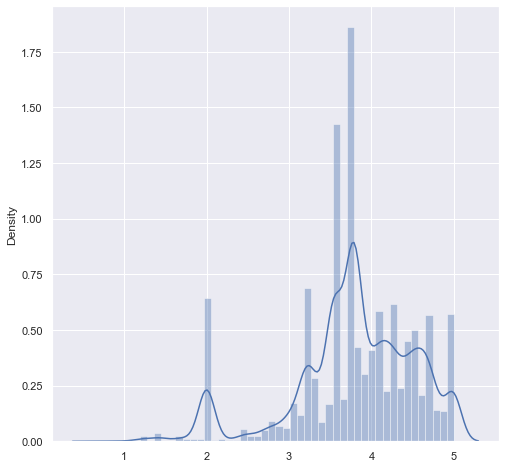

In [19]:
# Cap predictions at 5.0 rating

capped_pred = list(np.repeat(5, len(predictions[np.where(predictions > 5)])))

capped_pred = capped_pred + list(predictions[np.where(predictions <= 5)])

sns.distplot(capped_pred)

# Condensing Linear Regression into a Pipeline

In [20]:
def linear_pipeline(user, k):
    user_ratings = ratings[ratings.userId == user]
    
    # Creating feature dataframe

    feature_df = pd.DataFrame()
    for movie in user_ratings.movieId:
        feature_df = pd.concat([feature_df, 
                                movies.loc[movies.movieId == movie, list(all_genres)]])

    feature_df["rating"] = list(user_ratings.rating)

    model = LinearRegression()
    model.fit(X=feature_df.iloc[:, :-1], y=feature_df.rating)
    
    predictions = model.predict(movies[list(all_genres)])
    
    predicted_ratings = pd.DataFrame()
    predicted_ratings["movieId"] = movies["movieId"]
    predicted_ratings["title"] = movies["title"]
    predicted_ratings["predicted_rating"] = predictions
    
    # Removing already-watched titles
    watched_movies = user_ratings["movieId"]
    predicted_ratings = predicted_ratings[~predicted_ratings.movieId.isin(watched_movies)]
    
    predicted_ratings.sort_values(by="predicted_rating", ascending=False, inplace=True)
    
    return predicted_ratings.head(k)

In [21]:
linear_pipeline(1, 5)

,movieId,title,predicted_rating
4614,4719,Osmosis Jones (2001),5.795412
454,459,"Getaway, The (1994)",5.609739
9542,31367,"Chase, The (1994)",5.509348
3356,3452,Romeo Must Die (2000),5.507649
3104,3197,"Presidio, The (1988)",5.507649


In [22]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


# Item-Item Correlation on Toy Story

In [32]:
mini_ratings = ratings.iloc[:int(ratings.shape[0] * 0.1)]
mini_ratings.shape

(2500009, 4)

In [33]:
moviemat = mini_ratings.pivot_table(index="userId", columns="movieId", values="rating")
moviemat.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,208789,208793,208795,208800,208939,209049,209053,209055,209103,209163
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
movie = "Toy Story (1995)"
movie_id = movies.loc[movies.title == movie, "movieId"][0]
movie_id

1

In [35]:
user_ratings = moviemat[movie_id]
user_ratings

userId
1        NaN
2        3.5
3        4.0
4        3.0
5        4.0
        ... 
16654    NaN
16655    NaN
16656    5.0
16657    NaN
16658    5.0
Name: 1, Length: 16658, dtype: float64

In [36]:
similar_movies = moviemat.corrwith(user_ratings)
similar_movies

movieId
1         1.000000
2         0.327573
3         0.215914
4         0.166034
5         0.186446
            ...   
209049         NaN
209053         NaN
209055         NaN
209103         NaN
209163         NaN
Length: 29661, dtype: float64

In [37]:
corr_toy_story = pd.DataFrame(similar_movies, columns=["Correlation"])
corr_toy_story.dropna(inplace=True)
corr_toy_story.head()

,Correlation
movieId,
1,1.000000
2,0.327573
3,0.215914
4,0.166034
5,0.186446


In [38]:
rating_counts = ratings.groupby("movieId").count()["userId"]

In [39]:
rating_counts[rating_counts == 57309]

movieId
1    57309
Name: userId, dtype: int64

In [40]:
sorted_corr = corr_toy_story.sort_values(by="Correlation", ascending=False)
titles = []
num_ratings_lst = []
for movie_id in sorted_corr.index:
    
    num_ratings_lst.append(rating_counts[movie_id])
    
    title = movies.loc[movies.movieId == movie_id, "title"].values
    if len(title) == 0:
        titles.append(np.nan)
    else:
        titles.append(title[0])

sorted_corr["num_ratings"] = num_ratings_lst
sorted_corr["title"] = titles
sorted_corr.head(10)

,Correlation,num_ratings,title
movieId,,,
1,1.0,57309,Toy Story (1995)
157847,1.0,38,Being Charlie (2016)
157055,1.0,8,Uncaged (2016)
157130,1.0,10,Despite the Falling Snow (2016)
199566,1.0,27,The Aftermath (2019)
27488,1.0,26,Stark Raving Mad (2002)
27018,1.0,25,Fudoh: The New Generation (Gokudô sengokushi: ...
199898,1.0,11,Rebelles (2019)
26966,1.0,50,"Brave, The (1997)"


# Item-Item Correlation Pipeline

In [45]:
def item_corr_pipeline(movie_id, k):
    # Getting user ratings and correlations
    user_ratings = moviemat[movie_id]
    similar_movies = moviemat.corrwith(user_ratings)
    
    corr_movie = pd.DataFrame(similar_movies, columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    # Sorting and labeling movies
    titles = []
    num_ratings_lst = []
    for mov_id in corr_movie.index:
        num_ratings_lst.append(rating_counts[mov_id])
        
        title = movies.loc[movies.movieId == mov_id, "title"].values
        if len(title) == 0:
            titles.append(np.nan)
        else:
            titles.append(title[0])

    corr_movie["num_ratings"] = num_ratings_lst
    corr_movie["title"] = titles
    
    sorted_corr = corr_movie.sort_values(by=["Correlation", "num_ratings"], ascending=False)
    
    # Removing original movie
    movie_title = movies.loc[movies.movieId == movie_id, "title"].values[0]
    sorted_corr = sorted_corr[sorted_corr.title != movie_title]

    return sorted_corr.head(k)

In [46]:
item_corr_pipeline(1, 5)

,Correlation,num_ratings,title
movieId,,,
2904,1.0,134,Rain (1932)
84116,1.0,132,Poetry (Shi) (2010)
5935,1.0,124,Class of 1984 (1982)
103554,1.0,109,"Hijacking, A (Kapringen) (2012)"
168420,1.0,109,Justice League Dark (2017)


# Item-Item Correlation Pipeline (with num_ratings filtering)

In [47]:
import math

def item_corr_filtering_pipeline(movie_id, k):
    # Getting user ratings and correlations
    user_ratings = moviemat[movie_id]
    similar_movies = moviemat.corrwith(user_ratings)
    
    corr_movie = pd.DataFrame(similar_movies, columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    # Sorting and labeling movies
    titles = []
    num_ratings_lst = []
    for mov_id in corr_movie.index:
        num_ratings_lst.append(rating_counts[mov_id])
        
        title = movies.loc[movies.movieId == mov_id, "title"].values
        if len(title) == 0:
            titles.append(np.nan)
        else:
            titles.append(title[0])

    corr_movie["num_ratings"] = num_ratings_lst
    corr_movie["title"] = titles
    
    # Filtering for movies with above sqrt(num_ratings of movie)
    movie_num_ratings = corr_movie.loc[corr_movie.index == movie_id, "num_ratings"].values[0]
    corr_movie = corr_movie[corr_movie["num_ratings"] >= movie_num_ratings / 2]
    
    sorted_corr = corr_movie.sort_values(by=["Correlation", "num_ratings"], ascending=False)
    
    # Removing original movie
    movie_title = movies.loc[movies.movieId == movie_id, "title"].values[0]
    sorted_corr = sorted_corr[sorted_corr.title != movie_title]

    return sorted_corr.head(k)

In [48]:
item_corr_filtering_pipeline(1, 5)

,Correlation,num_ratings,title
movieId,,,
4886,0.563718,34572,"Monsters, Inc. (2001)"
6377,0.525033,34712,Finding Nemo (2003)
8961,0.500724,30562,"Incredibles, The (2004)"
588,0.452784,43373,Aladdin (1992)
4306,0.434607,42303,Shrek (2001)
